In [12]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

- 레이블 클래스
- 0	    T-shirt/top
- 1	    Trouser
- 2	    Pullover
- 3	    Dress
- 4	    Coat
- 5	    Sandal
- 6	    Shirt
- 7	    Sneaker
- 8	    Bag
- 9	    Ankle boot


- class에 이름이 지정되어 있지 않기 때문에 나중에 출력하기 위해 라벨링을 해준다.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [13]:
pd.Series(train_labels).value_counts() # 골고루 들어가 있음을 볼 수 있다.

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [14]:
train_images.shape  # 28*28 픽셀로 이루어진 60000개의 데이터셋

(60000, 28, 28)

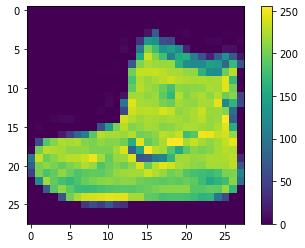

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# 255 까지의 값들로 존재.

In [22]:
# scaling 

train_images, test_images = train_images / 255, test_images / 255

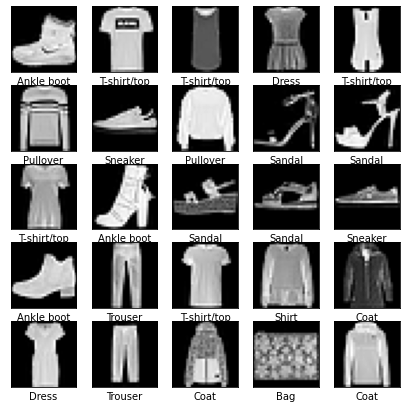

In [32]:
plt.figure(figsize = (7, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = 'gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()


- make layer

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [35]:
model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6269 - accuracy: 0.7809
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3862 - accuracy: 0.8613
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3439 - accuracy: 0.8741
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3170 - accuracy: 0.8821
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2974 - accuracy: 0.8910


In [42]:
test_loss, test_acc = model.evaluate(train_images, train_labels, verbose = 2)
print('test_loss : {0}, test_acc : {1}'.format(np.round(test_loss,3), np.round(test_acc,3)))

1875/1875 - 1s - loss: 0.2668 - accuracy: 0.9014
test_loss : 0.267, test_acc : 0.901


In [49]:
pred = model.predict(test_images)
np.argmax(pred[0])

4

In [75]:
''100*np.max(pred[0])

93.66918802261353

In [86]:
def plot_image(i, prediction_array, true_label, img):
    prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = 'gray')

    predicted_label = np.argmax(prediction_array)

    if predicted_label == true_label:
        color = 'blue'
    
    else:
        color = 'red'

    plt.xlabel('{} {}% ({})'.format(class_names[predicted_label], 
                                        np.round(100*np.max(prediction_array),3),
                                        class_names[true_label]),
                                        color = color)



def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = prediction_array[i], true_label[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    thisplot = plt.bar(range(10), prediction_array, color = '#777777')

    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

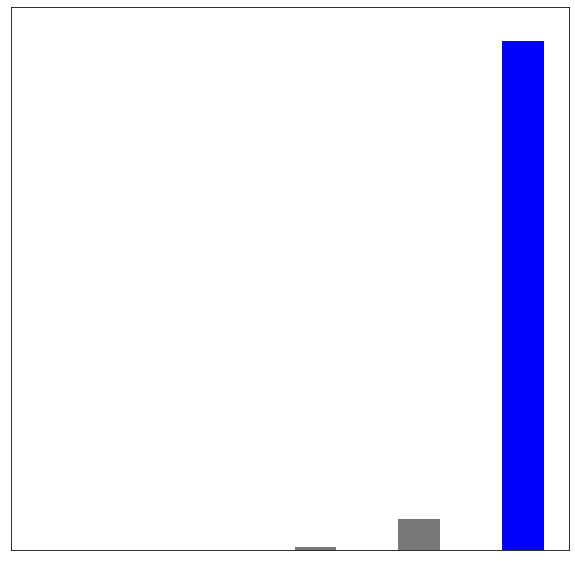

In [87]:
plt.figure(figsize = (10, 10))
plot_value_array(0, pred, test_labels)
plt.show()

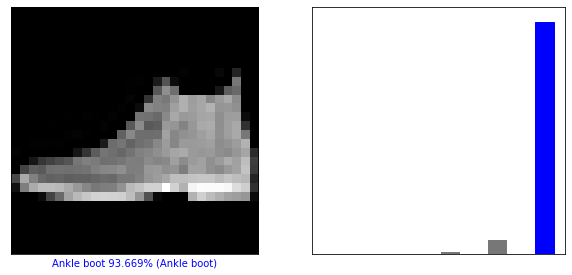

In [88]:
i = 0 
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(2, 2, 2)
plot_value_array(i, pred, test_labels)
plt.show()

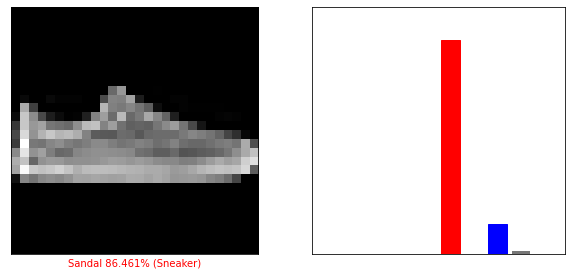

In [89]:
i = 12
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(2, 2, 2)
plot_value_array(i, pred, test_labels)
plt.show()

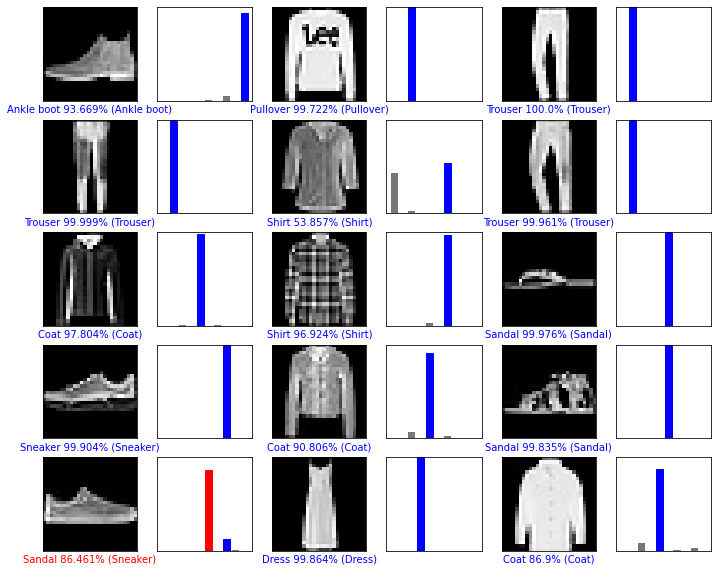

In [95]:
nrow = 5
ncol = 3

num_images = nrow * ncol
plt.figure(figsize=(2*2*ncol, 2*nrow))
for i in range(num_images):
    plt.subplot(nrow, 2*ncol, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(nrow, 2*ncol, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()



In [96]:
img = test_images[0]
print(img.shape)

(28, 28)


In [98]:
# 2차원 배열로 만들어준다.
img =  np.expand_dims(test_images[0], 0)
img.shape

(1, 28, 28)

In [101]:
prediction_single = model.predict(img)
prediction_single

array([[1.0325365e-05, 1.3720908e-08, 1.9783724e-07, 1.3706810e-08,
        3.6305130e-07, 6.2106973e-03, 1.1395805e-06, 5.7056166e-02,
        2.9129431e-05, 9.3669200e-01]], dtype=float32)

In [102]:
np.max(prediction_single)

0.936692

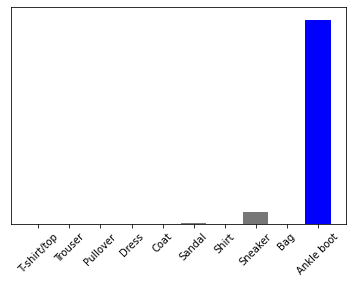

In [109]:
plot_value_array(0, prediction_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)


In [110]:
np.argmax(prediction_single)

9